In [4]:
import pandas as pd
import numpy as np

/home/dima/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [7]:
df = pd.read_csv('Sentiment_Analysis_Dataset.csv', sep=',', on_bad_lines = "skip")

In [8]:
df.shape

(1578612, 4)

In [9]:
df.head(-15)

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
...,...,...,...,...
1578592,1578608,1,Sentiment140,'Zu SpÃ¤t' by Die Ã„rzte. One of the best band...
1578593,1578609,1,Sentiment140,Zuma bitch tomorrow. Have a wonderful night ev...
1578594,1578610,0,Sentiment140,zummie's couch tour was amazing....to bad i ha...
1578595,1578611,0,Sentiment140,"ZuneHD looks great! OLED screen @720p, HDMI, o..."


In [10]:
import matplotlib.pyplot as plt
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [11]:
df['Sentiment'].value_counts()

Sentiment
1    790177
0    788435
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7fba579ea670>,
 [Text(-0.0019067454036312689, 1.099998347417834, 'Positive'),
  Text(0.0019067454036313784, -1.099998347417834, 'Negative')])

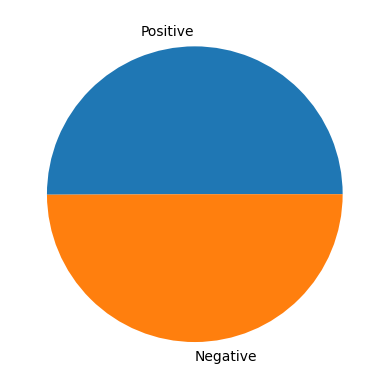

In [12]:
import seaborn as sns
vals = [790177, 788435]
mylabels = ["Positive", "Negative"]
fig, ax = plt.subplots()
ax.pie(vals, labels=mylabels)

In [13]:
length = len(df['SentimentText'][0])
print(f'Length of a sample review: {length}')

Length of a sample review: 61


In [14]:
df['Length'] = df['SentimentText'].str.len()
df.head(10)

,ItemID,Sentiment,SentimentSource,SentimentText,Length
0,1,0,Sentiment140,is so sad for my APL frie...,61
1,2,0,Sentiment140,I missed the New Moon trail...,51
2,3,1,Sentiment140,omg its already 7:30 :O,37
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,53
5,6,0,Sentiment140,or i just worry too much?,42
6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!,41
7,8,0,Sentiment140,Sunny Again Work Tomorrow :-| ...,61
8,9,1,Sentiment140,handed in my uniform today . i miss you ...,53
9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-),46


In [15]:
word_count = df['SentimentText'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 7


In [16]:
df.head(10)

,ItemID,Sentiment,SentimentSource,SentimentText,Length
0,1,0,Sentiment140,is so sad for my APL frie...,61
1,2,0,Sentiment140,I missed the New Moon trail...,51
2,3,1,Sentiment140,omg its already 7:30 :O,37
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,53
5,6,0,Sentiment140,or i just worry too much?,42
6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!,41
7,8,0,Sentiment140,Sunny Again Work Tomorrow :-| ...,61
8,9,1,Sentiment140,handed in my uniform today . i miss you ...,53
9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-),46


In [17]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [18]:
df['Word_count'] = df['SentimentText'].apply(word_count)
df.head(10)

,ItemID,Sentiment,SentimentSource,SentimentText,Length,Word_count
0,1,0,Sentiment140,is so sad for my APL frie...,61,7
1,2,0,Sentiment140,I missed the New Moon trail...,51,6
2,3,1,Sentiment140,omg its already 7:30 :O,37,5
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,132,25
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,53,9
5,6,0,Sentiment140,or i just worry too much?,42,6
6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!,41,2
7,8,0,Sentiment140,Sunny Again Work Tomorrow :-| ...,61,7
8,9,1,Sentiment140,handed in my uniform today . i miss you ...,53,10
9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-),46,8


In [19]:
df['mean_word_length'] = df['SentimentText'].map(lambda rev: np.mean([len(word) for word in rev.split()]))

In [20]:
df.head(10)

,ItemID,Sentiment,SentimentSource,SentimentText,Length,Word_count,mean_word_length
0,1,0,Sentiment140,is so sad for my APL frie...,61,7,4.857143
1,2,0,Sentiment140,I missed the New Moon trail...,51,6,4.500000
2,3,1,Sentiment140,omg its already 7:30 :O,37,5,3.800000
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,132,25,3.880000
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,53,9,3.333333
5,6,0,Sentiment140,or i just worry too much?,42,6,3.333333
6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!,41,2,16.500000
7,8,0,Sentiment140,Sunny Again Work Tomorrow :-| ...,61,7,4.857143
8,9,1,Sentiment140,handed in my uniform today . i miss you ...,53,10,3.800000
9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-),46,8,4.125000


In [21]:
!pip install nltk

import nltk
import string
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
nltk.download('punkt_tab')

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


[nltk_data] Downloading package stopwords to /home/dima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dima/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /home/dima/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dima/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/dima/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

In [23]:
def preprocessSentence(sentence):
    sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

    sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

    tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

    words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]

    words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)
    
    words_lemmatize = (re.sub(r"[^a-zA-Z0-9]","",w) for w in words_lemmatize)

    sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())

    return sentence_clean.split()

In [24]:
df_words = df['SentimentText'].apply(preprocessSentence)

In [25]:
df_words

0                                        [sad, friend]
1                                 [new, moon, trailer]
2                                            [already]
3          [cry, dentist, since, get, crown, put, min]
4                                [think, mi, cheating]
                              ...                     
1578607                      [finally, night, tweeter]
1578608                          [sleep, well, people]
1578609                               [wait, homework]
1578610                                             []
1578611                                         [wish]
Name: SentimentText, Length: 1578612, dtype: object

In [26]:
df['NewSentimentText'] = df_words

In [27]:
df

,ItemID,Sentiment,SentimentSource,SentimentText,Length,Word_count,mean_word_length,NewSentimentText
0,1,0,Sentiment140,is so sad for my APL frie...,61,7,4.857143,"[sad, friend]"
1,2,0,Sentiment140,I missed the New Moon trail...,51,6,4.500000,"[new, moon, trailer]"
2,3,1,Sentiment140,omg its already 7:30 :O,37,5,3.800000,[already]
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,132,25,3.880000,"[cry, dentist, since, get, crown, put, min]"
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,53,9,3.333333,"[think, mi, cheating]"
...,...,...,...,...,...,...,...,...
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!,36,4,8.000000,"[finally, night, tweeter]"
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people",27,4,5.750000,"[sleep, well, people]"
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.,39,6,5.500000,"[wait, homework]"
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?",45,8,4.625000,[]


In [28]:
import pandas as pd
from collections import Counter
data1 = {'column_name1': []}
data2 = {'column_name2': []}
for i in range(1578612):
    if df.loc[i, 'Sentiment'] == 0:
        string = df.loc[i, 'NewSentimentText']
        data1['column_name1'].append(string)
    if df.loc[i, 'Sentiment'] == 1:
        string = df.loc[i, 'NewSentimentText']
        data2['column_name2'].append(string)
data_01 = pd.DataFrame(data1)
data_02 = pd.DataFrame(data2)
all_words1 = [word.lower() for sublist in data_01['column_name1'] for word in sublist]
all_words2 = [word.lower() for sublist in data_02['column_name2'] for word in sublist]
word_counts1 = Counter(all_words1)
word_counts2 = Counter(all_words2)
print(word_counts1.most_common(20))
print(word_counts2.most_common(20))

[('day', 49673), ('get', 47726), ('go', 47165), ('dont', 44728), ('work', 44228), ('cant', 43380), ('like', 40986), ('got', 37935), ('today', 36639), ('want', 33583), ('going', 33181), ('back', 32114), ('miss', 31220), ('really', 30906), ('time', 30527), ('u', 29138), ('still', 28611), ('good', 28343), ('one', 28253), ('sad', 27016)]
[('good', 59612), ('day', 53031), ('love', 49369), ('u', 37919), ('like', 37877), ('get', 37766), ('thanks', 33717), ('time', 32825), ('got', 31278), ('going', 30264), ('go', 29567), ('today', 28881), ('one', 27377), ('new', 26382), ('know', 26289), ('see', 25442), ('great', 24799), ('well', 24464), ('back', 23192), ('night', 22974)]


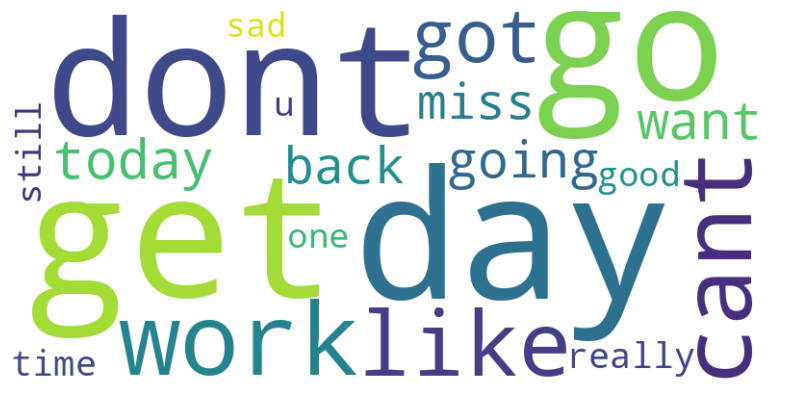

In [29]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ваш список кортежей (слово, частота)
word_freq_list = [('day', 49673), ('get', 47726), ('go', 47165), ('dont', 44728), ('work', 44228), ('cant', 43380), ('like', 40986), ('got', 37935), ('today', 36639), ('want', 33583), ('going', 33181), ('back', 32114), ('miss', 31220), ('really', 30906), ('time', 30527), ('u', 29138), ('still', 28611), ('good', 28343), ('one', 28253), ('sad', 27016)]

# Преобразуем список кортежей в словарь
word_freq_dict = dict(word_freq_list)

# Создаем объект WordCloud с использованием других параметров для минимизации ошибок
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq_dict)

# Отображаем облако слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Отключаем оси
plt.show()

In [30]:
def split_into_pairs(word_list):
    return [word_list[i:i+2] for i in range(0, len(word_list), 2)]
df['text_pairs'] = df['NewSentimentText'].apply(split_into_pairs)
df

,ItemID,Sentiment,SentimentSource,SentimentText,Length,Word_count,mean_word_length,NewSentimentText,text_pairs
0,1,0,Sentiment140,is so sad for my APL frie...,61,7,4.857143,"[sad, friend]","[[sad, friend]]"
1,2,0,Sentiment140,I missed the New Moon trail...,51,6,4.500000,"[new, moon, trailer]","[[new, moon], [trailer]]"
2,3,1,Sentiment140,omg its already 7:30 :O,37,5,3.800000,[already],[[already]]
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,132,25,3.880000,"[cry, dentist, since, get, crown, put, min]","[[cry, dentist], [since, get], [crown, put], [..."
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,53,9,3.333333,"[think, mi, cheating]","[[think, mi], [cheating]]"
...,...,...,...,...,...,...,...,...,...
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!,36,4,8.000000,"[finally, night, tweeter]","[[finally, night], [tweeter]]"
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people",27,4,5.750000,"[sleep, well, people]","[[sleep, well], [people]]"
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.,39,6,5.500000,"[wait, homework]","[[wait, homework]]"
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?",45,8,4.625000,[],[]


In [31]:
from nltk.util import bigrams

In [40]:
b = []
for i in range(1578612):
    string = (list(bigrams(df.loc[i,'NewSentimentText'])))
    b.append(string)
flat_list = [item for sublist in b for item in sublist]
counts = Counter(flat_list)


In [45]:
sorted_tuples = sorted(counts.items(), key=lambda x: x[1], reverse=True)
top_10 = sorted_tuples[:10]
print(top_10)

[(('gon', 'na'), 23421), (('wan', 'na'), 16247), (('cant', 'wait'), 13234), (('last', 'night'), 12216), (('good', 'morning'), 8994), (('got', 'ta'), 8898), (('feel', 'like'), 8316), (('dont', 'know'), 8281), (('look', 'like'), 6959), (('wish', 'could'), 6884)]


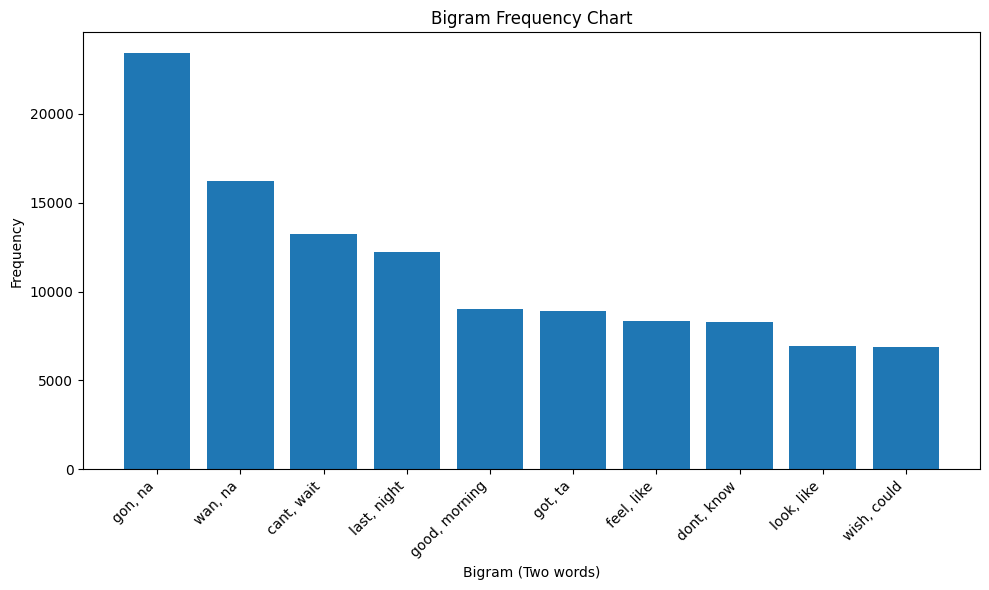

In [47]:
import matplotlib.pyplot as plt

# Пример списка кортежей (биграмма + частота)

# Разделение списка на биграммы и их частоты
bigrams, counts = zip(*top_10)

# Создание строки для каждой биграммы для отображения на оси X
labels = [f'{w1}, {w2}' for w1, w2 in bigrams]

# Построение диаграммы
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)

# Добавление подписей и заголовков
plt.xlabel('Bigram (Two words)')
plt.ylabel('Frequency')
plt.title('Bigram Frequency Chart')

# Поворот меток по оси X для лучшей читабельности
plt.xticks(rotation=45, ha="right")

# Отображение диаграммы
plt.tight_layout()
plt.show()
